PROYECTO INDIVIDUAL Nº1
Machine Learning Operations (MLOps)
Juan Camilo Candela COL

In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [23]:
import pandas as pd

# Configurar visualización de columnas en pandas para ver todas las columnas en DataFrame
pd.set_option('display.max_columns', None)

# Rutas a los archivos de datos
movies_data_file = 'data/movies_dataset.csv'
credits_data_file = 'data/credits.csv'

# Cargar el archivo movies_dataset.csv
try:
    movies_df = pd.read_csv(movies_data_file)
    print("Carga exitosa de movies_dataset.csv")
    print(f"Shape de movies_df: {movies_df.shape}")  # Imprimir la forma del DataFrame
except FileNotFoundError:
    print(f"El archivo {movies_data_file} no encontrado")
except Exception as e:
    print(f"Error al cargar {movies_data_file}: {e}")

# Cargar el archivo credits.csv
try:
    credits_df = pd.read_csv(credits_data_file)
    print("Carga exitosa de credits.csv")
    print(f"Shape de credits_df: {credits_df.shape}")  # Imprimir la forma del DataFrame
except FileNotFoundError:
    print(f"El archivo {credits_data_file} no encontrado")
except Exception as e:
    print(f"Error al cargar {credits_data_file}: {e}")

# Verificar las columnas y las primeras filas de movies_df si fue cargado correctamente
if 'movies_df' in globals() and not movies_df.empty:
    print("\nColumnas de movies_df:")
    print(movies_df.columns)
    print("\nPrimeras filas de movies_df:")
    print(movies_df.head())

# Verificar las columnas y las primeras filas de credits_df si fue cargado correctamente
if 'credits_df' in globals() and not credits_df.empty:
    print("\nColumnas de credits_df:")
    print(credits_df.columns)
    print("\nPrimeras filas de credits_df:")
    print(credits_df.head())


/tmp/ipykernel_3401/1057390527.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(movies_data_file)


Carga exitosa de movies_dataset.csv
Shape de movies_df: (45466, 24)
Carga exitosa de credits.csv
Shape de credits_df: (45476, 3)

Columnas de movies_df:
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Primeras filas de movies_df:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Br

In [24]:
# Rellenar los valores nulos de las columnas revenue y budget con 0
movies_df['revenue'] = movies_df['revenue'].fillna(0)
movies_df['budget'] = movies_df['budget'].fillna(0)

# Verificar que se han rellenado los valores nulos
print("Valores nulos en revenue después de la limpieza:", movies_df['revenue'].isnull().sum())
print("Valores nulos en budget después de la limpieza:", movies_df['budget'].isnull().sum())

# Imprimir las primeras filas para verificar los cambios
print(movies_df[['revenue', 'budget']].head().to_string(index=False))



Valores nulos en revenue después de la limpieza: 0
Valores nulos en budget después de la limpieza: 0
    revenue   budget
373554033.0 30000000
262797249.0 65000000
        0.0        0
 81452156.0 16000000
 76578911.0        0


In [25]:
# Eliminar las filas con valores nulos en la columna release_date
movies_df = movies_df.dropna(subset=['release_date'])

# Verificar que se han eliminado las filas con valores nulos en release_date
print("Valores nulos en release_date después de la limpieza:", movies_df['release_date'].isnull().sum())

# Imprimir las primeras filas para verificar los cambios
print(movies_df[['release_date']].head().to_string(index=False))


Valores nulos en release_date después de la limpieza: 0
release_date
  1995-10-30
  1995-12-15
  1995-12-22
  1995-12-22
  1995-02-10


In [26]:
#De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno

# Convertir la columna release_date al formato datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Eliminar las filas que no pudieron ser convertidas a formato datetime
movies_df = movies_df.dropna(subset=['release_date'])

# Asegurarse de que la fecha está en el formato AAAA-mm-dd
movies_df['release_date'] = movies_df['release_date'].dt.strftime('%Y-%m-%d')

# Crear la columna release_year extrayendo el año de la fecha de estreno
movies_df['release_year'] = movies_df['release_date'].apply(lambda x: x[:4])

# Verificar los cambios
print(movies_df[['release_date', 'release_year']].head().to_string(index=False))


release_date release_year
  1995-10-30         1995
  1995-12-15         1995
  1995-12-22         1995
  1995-12-22         1995
  1995-02-10         1995


In [27]:
#Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas 
#dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

# Asegurarse de que las columnas revenue y budget son numéricas
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

# Crear la columna return calculando revenue / budget, manejar divisiones por cero y valores nulos
movies_df['return'] = movies_df.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] != 0 else 0, axis=1)

# Verificar los cambios
print(movies_df[['revenue', 'budget', 'return']].head().to_string(index=False))


    revenue   budget    return
373554033.0 30000000 12.451801
262797249.0 65000000  4.043035
        0.0        0  0.000000
 81452156.0 16000000  5.090760
 76578911.0        0  0.000000


In [28]:
#Eliminar las columnas que no serán utilizadas, 
# video,imdb_id,adult,original_title,poster_path y homepage.

# Eliminar las columnas no utilizadas
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
movies_df = movies_df.drop(columns=columns_to_drop)

# Verificar los cambios
print("Columnas restantes en movies_df:")
print(movies_df.columns)


Columnas restantes en movies_df:
Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return'],
      dtype='object')


In [29]:
# Desanidamos belongs_to_collection, para formar dos nuevas columnas el id y el nombre del collection

import ast

# Función para extraer id_collection y name_collection de belongs_to_collection
def extract_collection_info(row):
    if pd.isna(row):
        return pd.Series([None, None])
    else:
        collection = ast.literal_eval(row)
        return pd.Series([collection.get('id'), collection.get('name')])

# Aplicar la función al DataFrame para crear las nuevas columnas
movies_df[['id_collection', 'name_collection']] = movies_df['belongs_to_collection'].apply(extract_collection_info)

# Eliminar la columna belongs_to_collection
movies_df = movies_df.drop(columns=['belongs_to_collection'])

# Verificar los cambios
print(movies_df[['id_collection', 'name_collection']].head())


   id_collection                 name_collection
0        10194.0            Toy Story Collection
1            NaN                            None
2       119050.0       Grumpy Old Men Collection
3            NaN                            None
4        96871.0  Father of the Bride Collection


In [30]:
# Eliminar filas que contienen NaN o None en las columnas id_collection y name_collection
movies_df = movies_df.dropna(subset=['id_collection', 'name_collection'])

# Verificar los cambios
print(movies_df[['id_collection', 'name_collection']].head())


    id_collection                 name_collection
0         10194.0            Toy Story Collection
2        119050.0       Grumpy Old Men Collection
4         96871.0  Father of the Bride Collection
9           645.0           James Bond Collection
12       117693.0                Balto Collection


In [31]:
# Desanidamos genres, para solo dejar los generos que tenga la pelicula separadas por coma
# Función para desanidar los géneros
def extract_genres(genres_list):
    genres_cleaned = []
    for genre in genres_list:
        genres_cleaned.append(genre['name'])
    return ', '.join(genres_cleaned)

# Aplicar la función a la columna genres
movies_df['genres_cleaned'] = movies_df['genres'].apply(lambda x: extract_genres(eval(x) if isinstance(x, str) else []))

# Mostrar las primeras filas del DataFrame para verificar
movies_df.head(10)




,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,id_collection,name_collection,genres_cleaned
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,10194.0,Toy Story Collection,"Animation, Comedy, Family"
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,119050.0,Grumpy Old Men Collection,"Romance, Comedy"
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,96871.0,Father of the Bride Collection,Comedy
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995,6.072311,645.0,James Bond Collection,"Adventure, Action, Thriller"
12,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,en,An outcast half-wolf risks his life to prevent...,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,7.1,423.0,1995,0.000000,117693.0,Balto Collection,"Family, Animation, Adventure"
18,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,"[{'name': 'O Entertainment', 'id': 5682}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,6.1,1128.0,1995,7.079518,3167.0,Ace Ventura Collection,"Crime, Comedy, Adventure"
20,30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.669608,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,6.4,305.0,1995,3.805012,91698.0,Chili Palmer Collection,"Comedy, Thriller, Crime"
33,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",9598,en,Babe is a little pig who doesn't quite know hi...,14.404764,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,254134910.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A little pig goes a long way.,Babe,6.0,756.0,1995,8.471164,9435.0,Babe Collection,"Fantasy, Drama, Comedy, Family"
43,18000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",9312,en,For nine generations an evil sorcerer has been...,10.870138,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name

In [32]:
# Función para extraer el nombre de la productora
def extract_producer(producer_list):
    if isinstance(producer_list, str):
        producers = eval(producer_list)  # Convertir la cadena JSON a lista de diccionarios
        if len(producers) > 0:
            return producers[0]['name']  # Devolver el nombre de la primera productora
    return None

# Aplicar la función a la columna production_companies y crear la nueva columna producer_cleaned
movies_df['producer_cleaned'] = movies_df['production_companies'].apply(lambda x: extract_producer(x))

# Mostrar las primeras filas del DataFrame para verificar
movies_df.head(10)


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,id_collection,name_collection,genres_cleaned,producer_cleaned
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,10194.0,Toy Story Collection,"Animation, Comedy, Family",Pixar Animation Studios
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,119050.0,Grumpy Old Men Collection,"Romance, Comedy",Warner Bros.
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,96871.0,Father of the Bride Collection,Comedy,Sandollar Productions
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995,6.072311,645.0,James Bond Collection,"Adventure, Action, Thriller",United Artists
12,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,en,An outcast half-wolf risks his life to prevent...,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,7.1,423.0,1995,0.000000,117693.0,Balto Collection,"Family, Animation, Adventure",Universal Pictures
18,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,"[{'name': 'O Entertainment', 'id': 5682}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,6.1,1128.0,1995,7.079518,3167.0,Ace Ventura Collection,"Crime, Comedy, Adventure",O Entertainment
20,30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.669608,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,6.4,305.0,1995,3.805012,91698.0,Chili Palmer Collection,"Comedy, Thriller, Crime",Jersey Films
33,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",9598,en,Babe is a little pig who doesn't quite know hi...,14.404764,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,254134910.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A little pig goes a long way.,Babe,6.0,756.0,1995,8.471164,9435.0,Babe Collection,"Fantasy, Drama, Comedy, Family",Universal Pictures
43,18000000,"[{'id': 28, 'name': 'Action'}, {'id': 14,

In [33]:
# Función para extraer el nombre del país
def extract_country(country_list):
    if isinstance(country_list, str):
        countries = eval(country_list)  # Convertir la cadena JSON a lista de diccionarios
        if len(countries) > 0:
            return countries[0]['name']  # Devolver el nombre del primer país
    return None

# Aplicar la función a la columna production_countries y crear la nueva columna Country_cleaned
movies_df['Country_cleaned'] = movies_df['production_countries'].apply(lambda x: extract_country(x))

# Mostrar las primeras filas del DataFrame para verificar
movies_df.head(10)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,id_collection,name_collection,genres_cleaned,producer_cleaned,Country_cleaned
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,10194.0,Toy Story Collection,"Animation, Comedy, Family",Pixar Animation Studios,United States of America
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,119050.0,Grumpy Old Men Collection,"Romance, Comedy",Warner Bros.,United States of America
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,96871.0,Father of the Bride Collection,Comedy,Sandollar Productions,United States of America
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995,6.072311,645.0,James Bond Collection,"Adventure, Action, Thriller",United Artists,United Kingdom
12,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,en,An outcast half-wolf risks his life to prevent...,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,7.1,423.0,1995,0.000000,117693.0,Balto Collection,"Family, Animation, Adventure",Universal Pictures,United States of America
18,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,"[{'name': 'O Entertainment', 'id': 5682}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,6.1,1128.0,1995,7.079518,3167.0,Ace Ventura Collection,"Crime, Comedy, Adventure",O Entertainment,United States of America
20,30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.669608,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,6.4,305.0,1995,3.805012,91698.0,Chili Palmer Collection,"Comedy, Thriller, Crime",Jersey Films,United States of America
33,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",9598,en,Babe is a little pig who doesn't quite know hi...,14.404764,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,254134910.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A littl

In [34]:
# Función para extraer el nombre del idioma
def extract_language(language_list):
    if isinstance(language_list, str):
        languages = eval(language_list)  # Convertir la cadena JSON a lista de diccionarios
        if len(languages) > 0:
            return languages[0]['name']  # Devolver el nombre del primer idioma
    return None

# Aplicar la función a la columna spoken_languages y crear la nueva columna Language_cleaned
movies_df['Language_cleaned'] = movies_df['spoken_languages'].apply(lambda x: extract_language(x))

# Mostrar las primeras filas del DataFrame para verificar
movies_df.head(10)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,id_collection,name_collection,genres_cleaned,producer_cleaned,Country_cleaned,Language_cleaned
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,10194.0,Toy Story Collection,"Animation, Comedy, Family",Pixar Animation Studios,United States of America,English
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,119050.0,Grumpy Old Men Collection,"Romance, Comedy",Warner Bros.,United States of America,English
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,96871.0,Father of the Bride Collection,Comedy,Sandollar Productions,United States of America,English
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0,1995,6.072311,645.0,James Bond Collection,"Adventure, Action, Thriller",United Artists,United Kingdom,English
12,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,en,An outcast half-wolf risks his life to prevent...,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,7.1,423.0,1995,0.000000,117693.0,Balto Collection,"Family, Animation, Adventure",Universal Pictures,United States of America,English
18,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,"[{'name': 'O Entertainment', 'id': 5682}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,6.1,1128.0,1995,7.079518,3167.0,Ace Ventura Collection,"Crime, Comedy, Adventure",O Entertainment,United States of America,English
20,30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.669608,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,6.4,305.0,1995,3.805012,91698.0,Chili Palmer Collection,"Comedy, Thriller, Crime",Jersey Films,United States of America,English
33,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",9598,en,Babe is a little pig who doesn't quite know hi...,14.404764,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,254

In [35]:
# Eliminar las filas donde el budget es 0
movies_df = movies_df[movies_df['budget'] != 0]
# Eliminar las filas donde el title es NaN
movies_df = movies_df[movies_df['title'].notna()]

# Exportar el DataFrame resultante a un archivo CSV, para ser el insumo de nuestro FastApi
output_file = 'data/movies_df_fastApi.csv'
movies_df.to_csv(output_file, index=False)




CREDITOS

In [36]:
# Función para desanidar la columna cast
def explode_cast(df):
    cast_data = []
    
    # Iterar sobre cada fila en el DataFrame
    for _, row in df.iterrows():
        try:
            cast_list = ast.literal_eval(row['cast'])
        except:
            continue
        
        # Iterar sobre cada diccionario en la lista de cast
        for cast_member in cast_list:
            cast_data.append({
                'id': row['id'],
                'cast_id': cast_member.get('cast_id', None),
                'character': cast_member.get('character', None),
                'credit_id': cast_member.get('credit_id', None),
                'gender': cast_member.get('gender', None),
                'actor_id': cast_member.get('id', None),
                'name': cast_member.get('name', None),
                'order': cast_member.get('order', None),
                'profile_path': cast_member.get('profile_path', None)
            })
    
    # Crear un nuevo DataFrame con los datos desanidados
    cast_df = pd.DataFrame(cast_data)
    return cast_df

# Aplicar la función para desanidar el cast y agregar las columnas al DataFrame
cast_df = explode_cast(credits_df)

# Mostrar las primeras filas del DataFrame desanidado para verificar
cast_df.head(10)


,id,cast_id,character,credit_id,gender,actor_id,name,order,profile_path
0,862,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,862,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,862,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,862,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,862,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
5,862,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg
6,862,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg
7,862,26,Andy (voice),52fe4284c3a36847f8024fc1,0,1116442,John Morris,7,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg
8,862,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg
9,862,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg


In [37]:
# Función para desanidar la columna crew
def explode_crew(df):
    crew_data = []
    
    # Iterar sobre cada fila en el DataFrame
    for _, row in df.iterrows():
        try:
            crew_list = ast.literal_eval(row['crew'])
        except:
            continue
        
        # Iterar sobre cada diccionario en la lista de crew
        for crew_member in crew_list:
            crew_data.append({
                'id': row['id'],
                'credit_id_crew': crew_member.get('credit_id', None),
                'department_crew': crew_member.get('department', None),
                'gender_crew': crew_member.get('gender', None),
                'crew_id': crew_member.get('id', None),
                'job_crew': crew_member.get('job', None),
                'name_crew': crew_member.get('name', None),
                'profile_path_crew': crew_member.get('profile_path', None)
            })
    
    # Crear un nuevo DataFrame con los datos desanidados
    crew_df = pd.DataFrame(crew_data)
    return crew_df

# Aplicar la función para desanidar el crew y agregar las columnas al DataFrame
crew_df = explode_crew(credits_df)

# Mostrar las primeras filas del DataFrame desanidado para verificar
crew_df.head(10)
crew_df.dropna(inplace=True)


In [38]:
# Exportar el DataFrame cast_df a un archivo CSV (actor)
cast_df.to_csv('data/cast_df.csv', index=False)
print("El DataFrame cast_df ha sido exportado a data/cast_df.csv")

# Exportar el DataFrame crew_df a un archivo CSV (director)
crew_df.to_csv('data/crew_df.csv', index=False)
print("El DataFrame crew_df ha sido exportado a data/crew_df.csv")


El DataFrame cast_df ha sido exportado a data/cast_df.csv
El DataFrame crew_df ha sido exportado a data/crew_df.csv


EDA

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar el tamaño del dataframe después de la limpieza
print("Shape de movies_df después de la limpieza:", movies_df.shape)
print("Shape de cast_df después de la limpieza:", cast_df.shape)
print("Shape de crew_df después de la limpieza:", crew_df.shape)

print(movies_df.describe())
print(cast_df.describe())
print(crew_df.describe())


Shape de movies_df después de la limpieza: (1585, 25)
Shape de cast_df después de la limpieza: (562474, 9)
Shape de crew_df después de la limpieza: (95098, 8)
             budget       revenue      runtime  vote_average    vote_count  \
count  1.585000e+03  1.585000e+03  1585.000000   1585.000000   1585.000000   
mean   3.827066e+07  1.509350e+08   104.557729      6.050347   1072.109148   
std    5.286495e+07  2.485717e+08    21.686747      0.979468   1689.764738   
min    5.000000e+00  0.000000e+00     0.000000      0.000000      0.000000   
25%    4.500000e+06  1.040000e+06    91.000000      5.500000     98.000000   
50%    1.600000e+07  4.887850e+07   100.000000      6.100000    367.000000   
75%    5.000000e+07  1.792469e+08   115.000000      6.700000   1212.000000   
max    3.800000e+08  2.787965e+09   320.000000      8.500000  12269.000000   

             return  id_collection  
count  1.585000e+03    1585.000000  
mean   6.602755e+02  137016.989274  
std    2.558752e+04  131653

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

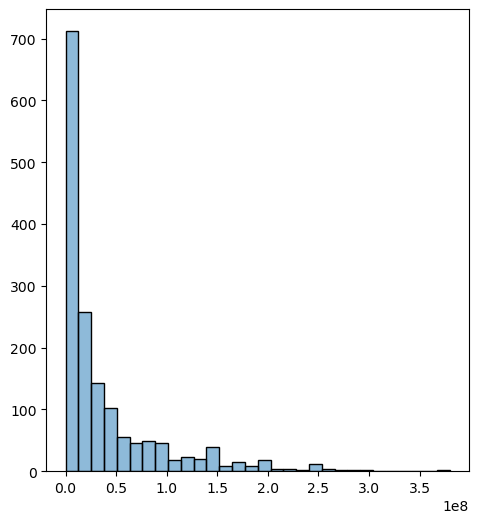

In [40]:
# **Distribución del Presupuesto y Retorno**
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(movies_df['budget'], bins=30, kde=True)
plt.title('Distribución del Presupuesto')

plt.subplot(1, 2, 2)
sns.histplot(movies_df['return'], bins=30, kde=True)
plt.title('Distribución del Retorno')

plt.tight_layout()
plt.show()

Primeros valores del presupuesto: [30000000 58000000 30000000 30250000 30000000 18000000 55000000  3500000
 19000000 20000000]
Primeros valores del retorno: [12.4518011   6.07231093  7.07951777  3.8050123   8.47116367  6.78866222
  6.29235951  8.06169086  1.35982189  0.28909425]


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

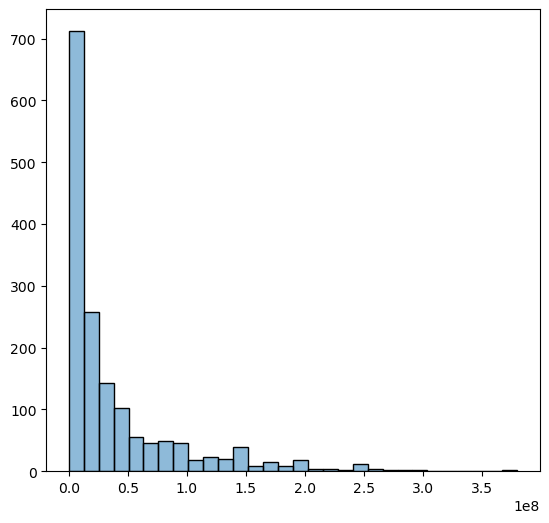

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Asegúrate de que los datos sean numéricos y manejar los NaN
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['return'] = pd.to_numeric(movies_df['return'], errors='coerce')

# Eliminar filas con valores NaN o presupuesto <= 0
movies_df = movies_df.dropna(subset=['budget', 'return'])
movies_df = movies_df[movies_df['budget'] > 0]

# Verificar que los datos sean unidimensionales y no contengan valores NaN
budget_data = movies_df['budget'].dropna().values
return_data = movies_df['return'].dropna().values

# Verifica los primeros elementos de los arrays
print("Primeros valores del presupuesto:", budget_data[:10])
print("Primeros valores del retorno:", return_data[:10])

# Visualizar distribución del presupuesto y retorno
plt.figure(figsize=(14, 6))

# Distribución del Presupuesto
plt.subplot(1, 2, 1)
sns.histplot(budget_data, bins=30, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

# Distribución del Retorno
plt.subplot(1, 2, 2)
sns.histplot(return_data, bins=30, kde=True)
plt.title('Distribución del Retorno')
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Matriz de Correlación:
           budget    return   revenue
budget   1.000000 -0.018581  0.794995
return  -0.018581  1.000000 -0.003492
revenue  0.794995 -0.003492  1.000000


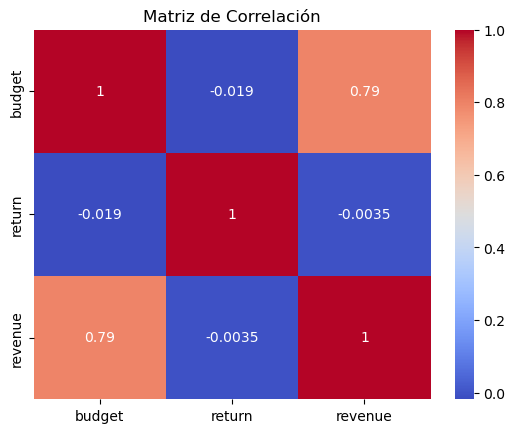

In [42]:
# **Análisis de Correlación**
correlation_matrix = movies_df[['budget', 'return', 'revenue']].corr()
print("Matriz de Correlación:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

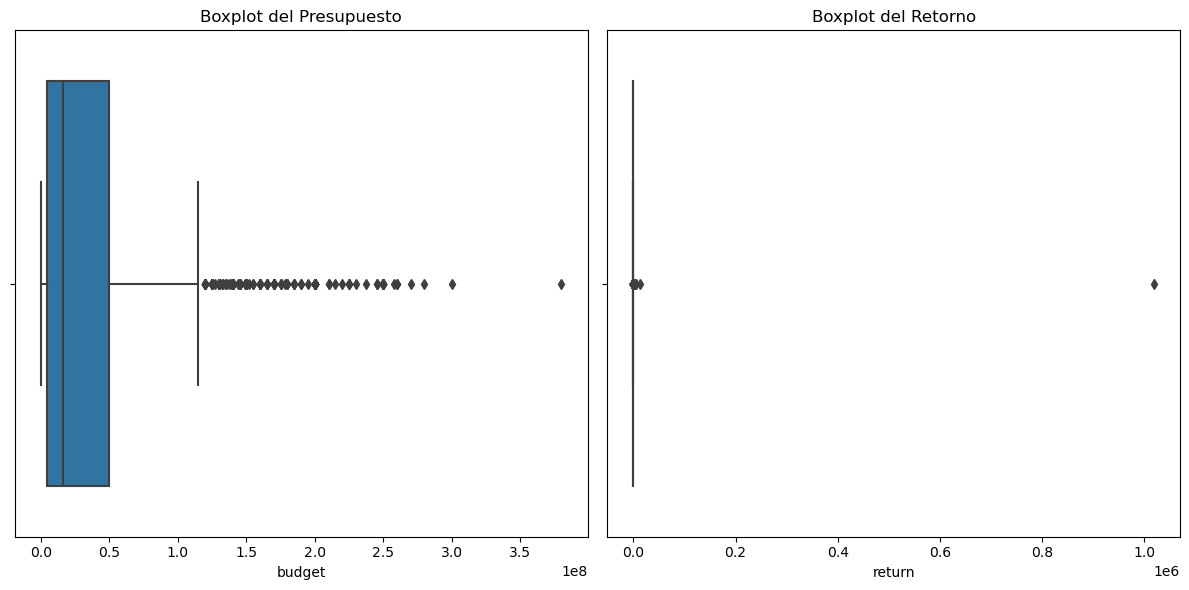

In [43]:
# **Detección de Outliers**
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=movies_df['budget'])
plt.title('Boxplot del Presupuesto')

plt.subplot(1, 2, 2)
sns.boxplot(x=movies_df['return'])
plt.title('Boxplot del Retorno')

plt.tight_layout()
plt.show()


/tmp/ipykernel_3401/3529420265.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_df, x='release_year', y='return', ci=None)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

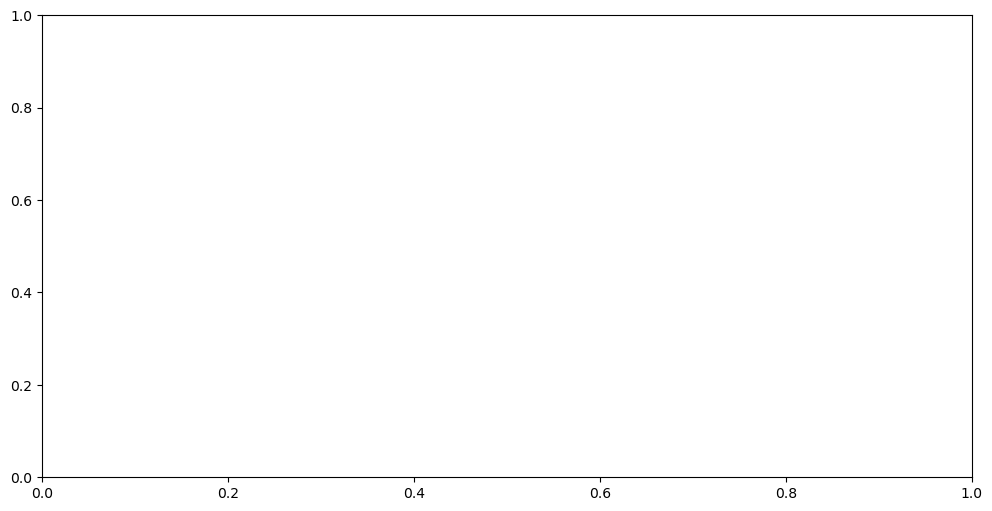

In [44]:
# **Patrones y Tendencias**
# Análisis Temporal del Retorno
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_df, x='release_year', y='return', ci=None)
plt.title('Tendencia del Retorno por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Retorno')
plt.show()

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que no haya NaN en la columna 'title'
text = ' '.join(title for title in movies_df['title'].dropna())

# Crear y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Títulos de Películas')
plt.show()


ValueError: Only supported for TrueType fonts

Para poder ejecutar todo en RENDER, es necesario reducir el tamaño de las muestras. Para ello obtenemos una muestra del 20%, de forma aleatoria, de la data de cada uno de los DataFrames utilizados.

In [47]:
# Eliminar filas con valores nulos en cualquier columna
cast_df_clean = cast_df.dropna()
movies_df_clean = movies_df.dropna()
crew_df_clean = crew_df.dropna()

# Seleccionar una muestra del 20% de los datos limpios
cast_df_sample = cast_df_clean.sample(frac=0.2, random_state=1)
movies_df_sample = movies_df_clean.sample(frac=0.2, random_state=1)
crew_df_sample = crew_df_clean.sample(frac=0.2, random_state=1)

# Exportar los DataFrames de muestra a archivos CSV
cast_df_sample.to_csv('cast_df.csv', index=False)
movies_df_sample.to_csv('movies.csv', index=False)
crew_df_sample.to_csv('crew_df.csv', index=False)

print("Los DataFrames de muestra han sido limpiados y exportados exitosamente.")


Los DataFrames de muestra han sido limpiados y exportados exitosamente.


In [53]:
#movies_df_sample.head(20)
cast_df_sample.head(20)
#crew_df_sample.head(20)

#movies_df.head(10)

,id,cast_id,character,credit_id,gender,actor_id,name,order,profile_path
458443,8430,13,Herodes Antipas,5754a0fcc3a36867a00022e6,0,240665,Toni Ucci,7,/qOwxtC5epaYS2L7h8dCAs1sR6gZ.jpg
29938,36568,11,Virgil the Janitor,52fe45f39251416c91044111,2,8854,Bill Cobbs,9,/cP2ETKFdk93z4e1oXZVG0utI3IM.jpg
326148,161315,14,Mrs. Peters,52fe4c42c3a36847f8225643,1,8232,Ethel Griffies,10,/m3pXmGCIlccqKUi9ERM1aiBNhTw.jpg
300269,31147,7,Himself (archive footage),592b41f9c3a36877ee067fc0,2,84678,Johnny Cash,4,/oAePUUrmixvi7VcNOYx3BtjEHFF.jpg
421511,308447,20,Rey Mysteriopal (voice),54ef54f6c3a3684aff001a96,0,568555,Oscar Gutierrez Rubio,15,/i9qivapMjoikcfi69SUKZuCCg2c.jpg
418940,17903,1031,Queen,53148e11c3a36829e2005590,1,85174,Song Ji-hyo,2,/8zF0O67U5mBR41FyKgMoypN9ZOg.jpg
54902,619,81,Rachel's Assistant,5987294d9251415284009e3d,0,1864616,Towanna King,24,/vgkUgjCiwHeTlHRLeuxEY43knbQ.jpg
176432,18553,7,Rick Martino,52fe47869251416c7509c7c7,2,84955,Myk Watford,4,/7PMUVPtCvt2DJEvH5dhimM6qiZg.jpg
404139,62008,16,,52fe466ec3a368484e090599,2,55541,Eddie Cibrian,5,/wFlcyM88N0ECJpo8QsUg1PNaf1q.jpg
210925,25528,22,Pango,52fe44cdc3a368484e037c2b,0,1120220,Jody Abrahams,9,/HeGe7Q17j3EjJuJPP8VCbn80Gp.jpg
